#  SGD Regressor

In [1]:
# Importing Libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from numpy import *
from numpy import random
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import random
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import math
from sklearn.metrics import mean_squared_error

In [2]:
# Loading Boston Data Set from Scikit Learn
boston = load_boston()

In [3]:
bos = pd.DataFrame(boston.data,columns=boston.feature_names)

In [4]:
# Defining X & Y from the Boston Data Sets
bos['PRICE'] = boston.target
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [5]:
# Standardising the data using the Standard Scalar 
stdscalar = StandardScaler().fit(X)
X=stdscalar.transform(X)
X=pd.DataFrame(X)

## Gradient Descent algorithm for Linear Regression

In [6]:
def gradient(X,Y,iterations,learning_rate):

    N=len(Y)
    w=np.zeros(X.shape[1],)
    b=np.zeros(N,)
    rms_error=[]
    for i in range(iterations):
        y_cur= X.dot(w) + b
        error=Y - y_cur
        rms = math.sqrt(sum(error ** 2)/N)
        rms_error.append(rms)
        w_grad = -2 * sum(X.T.dot(error))/N
        b_grad = -2 * sum(error)/N
        w = w - (w_grad * learning_rate)
        b = b - (b_grad * learning_rate)
    return w,b,rms_error
            

In [7]:
iters=1000
w,b,rms_error=gradient(X,Y,iterations=1000,learning_rate=0.01)

In [8]:
print("Initial Error with both b & m as 0 = {0} \n\n After {1} iterations \n\n w = {2} \n\n b = {3} \n\n error = {4}"
      .format(rms_error[0],iters, w, sum(b)/len(b) , min(rms_error) ))

Initial Error with both b & m as 0 = 24.334069059572577 

 After 1000 iterations 

 w = [-0.90970641 -0.90970641 -0.90970641 -0.90970641 -0.90970641 -0.90970641
 -0.90970641 -0.90970641 -0.90970641 -0.90970641 -0.90970641 -0.90970641
 -0.90970641] 

 b = 22.5328062861887 

 error = 8.250999446027386


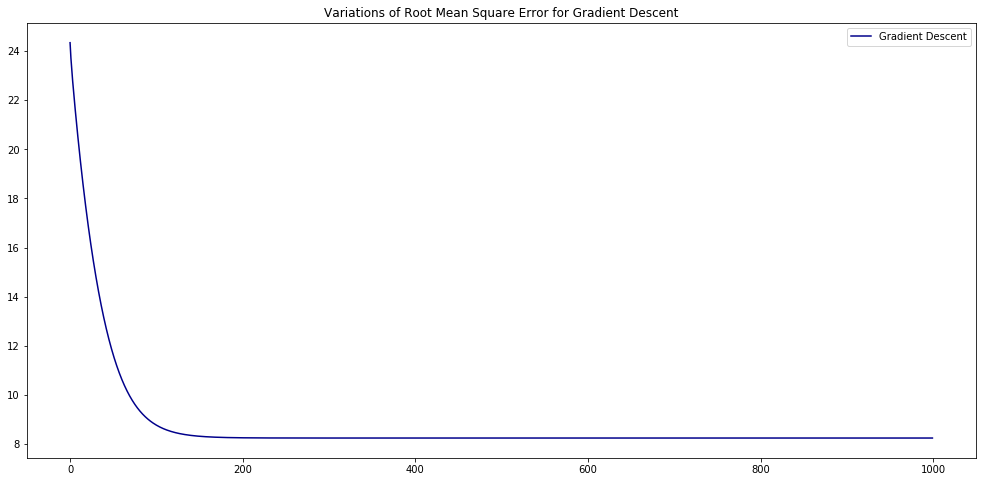

In [9]:
# Plotting the variations of Linear Regression with Gradient Descent over Iterations
plt.figure(figsize=(17,8))
plt.plot(np.arange(0,iters,1),rms_error, color='darkblue', label="Gradient Descent")   
plt.title("Variations of Root Mean Square Error for Gradient Descent")
plt.legend()
plt.show()

## Stochastic Gradient Descent Algorithm for Linear Regression

In [10]:
def get_mini_batches(X, Y, batch_size):
    random_indices=np.random.randint(0,len(Y),batch_size)
    X_rand=[]
    Y_rand=[]
    for each in random_indices:
        X_rand.append(X.iloc[each])
        Y_rand.append(Y[each])
    return pd.DataFrame(X_rand),Y_rand

In [11]:
def stochastic_gradient(X,Y,batch_size,iterations,learning_rate):

    w=np.zeros(X.shape[1],)
    b=np.zeros(batch_size,)
    rms_error=[]
    for i in range(iterations):
        X_rand,Y_rand = get_mini_batches(X, Y, batch_size)
        y_cur= X_rand.dot(w) + b
        error=Y_rand - y_cur
        rms = math.sqrt(sum(error ** 2)/batch_size)
        rms_error.append(rms)
        w_grad = -2 * sum(X_rand.T.dot(error))/batch_size
        b_grad = -2 * sum(error)/batch_size
        w = w - (w_grad * learning_rate)
        b = b - (b_grad * learning_rate)
    return w,b,rms_error
            

In [12]:
iters=1000
w,b,rms_error = stochastic_gradient(X,Y,batch_size=10,iterations=1000,learning_rate=0.01)

In [13]:
print("Initial Error with both b & m as 0 = {0} \n\n After {1} iterations \n\n w = {2} \n\n b = {3} \n\n error = {4}"
      .format(rms_error[0],iters, w, sum(b)/len(b) , min(rms_error) ))

Initial Error with both b & m as 0 = 23.52475292112544 

 After 1000 iterations 

 w = [-0.53678223 -0.53678223 -0.53678223 -0.53678223 -0.53678223 -0.53678223
 -0.53678223 -0.53678223 -0.53678223 -0.53678223 -0.53678223 -0.53678223
 -0.53678223] 

 b = 22.033754828788823 

 error = 2.8065714300647633


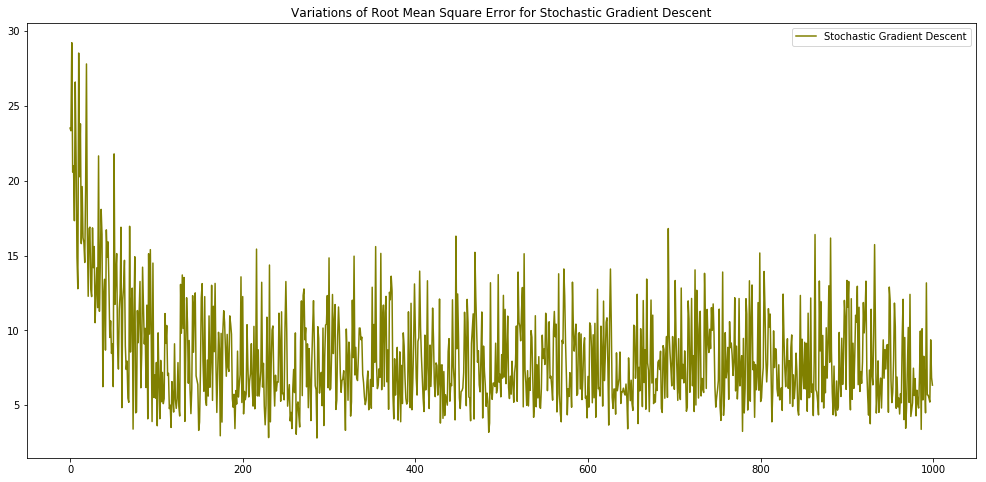

In [14]:
# Plotting the variations of Linear Regression with Gradient Descent over Iterations
plt.figure(figsize=(17,8))
plt.plot(np.arange(0,iters,1),rms_error, color='olive', label="Stochastic Gradient Descent")   
plt.title("Variations of Root Mean Square Error for Stochastic Gradient Descent")
plt.legend()
plt.show()

## Linear Regression with Stochastic Gradient Descent 

In [15]:
clf= linear_model.SGDRegressor(loss="squared_loss", penalty="l2",alpha=100, learning_rate='constant',
                               eta0=0.1 ,max_iter=1000,random_state =42)

In [16]:
clf.fit(X,Y)

SGDRegressor(alpha=100, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [17]:
pred=clf.predict(X)
scikit_mse=sum((Y-pred)**2)/len(Y)
Rms= math.sqrt(mean_squared_error(Y, pred))

In [18]:
print("After {0} iterations \n\n w = {1} \n\n b = {2} \n\n error = {3}"
      .format(clf.n_iter_, clf.coef_ , clf.intercept_ , Rms ))

After 1000 iterations 

 w = [ 0.21832902  0.27379023  0.10130255  0.15302728  0.05186308  0.46356458
 -0.1821594  -0.04001694  0.35812938  0.34753763  0.01441397 -0.24463669
  0.09073299] 

 b = [21.61897923] 

 error = 9.392167086128145


In [19]:
type(clf.coef_ )

numpy.ndarray

In [20]:
print('SGD: \n',w ,'\n\n','SGD - Scikit Learn: \n',clf.coef_)

SGD: 
 [-0.53678223 -0.53678223 -0.53678223 -0.53678223 -0.53678223 -0.53678223
 -0.53678223 -0.53678223 -0.53678223 -0.53678223 -0.53678223 -0.53678223
 -0.53678223] 

 SGD - Scikit Learn: 
 [ 0.21832902  0.27379023  0.10130255  0.15302728  0.05186308  0.46356458
 -0.1821594  -0.04001694  0.35812938  0.34753763  0.01441397 -0.24463669
  0.09073299]


In [23]:
print('SGD: \n',sum(b)/len(b) ,'\n\n','SGD - Scikit Learn: \n',clf.intercept_[0])

SGD: 
 22.033754828788823 

 SGD - Scikit Learn: 
 21.618979225490637


## Conclusion
             
            We conclude that the "Root Mean Squared Error" of the SGD Regressor from the Scikit Learn and the SGD Regressor form Scratch is 9.3 & 2.7